# AutoRegressive Integrated Moving Average

In [41]:
from statsmodels.api import datasets
import pandas as pd
dta = datasets.sunspots.load_pandas().data

dta

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [42]:
dta['YEAR'] = pd.to_datetime(dta['YEAR'].apply(lambda x: f'{int(x)}-12-31'))
dta.set_index('YEAR', inplace=True)
dta

,SUNACTIVITY
YEAR,
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
...,...
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2


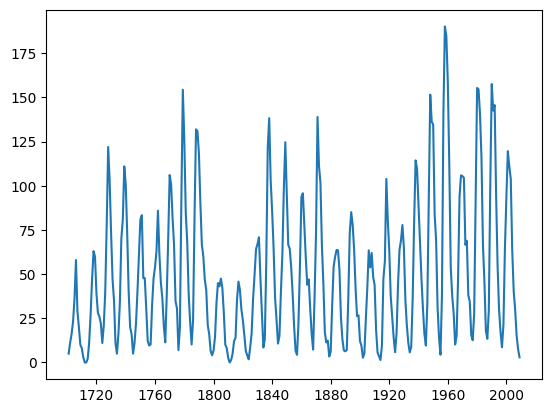

In [44]:
import matplotlib.pyplot as plt
plt.plot(dta.index, dta.SUNACTIVITY)

In [45]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [47]:
adf_test(dta)

Results of Dickey-Fuller Test:
Test Statistic                  -2.837781
p-value                          0.053076
#Lags Used                       8.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


In [48]:
sun= dta.diff().dropna()
adf_test(sun)

Results of Dickey-Fuller Test:
Test Statistic                -1.486166e+01
p-value                        1.715552e-27
#Lags Used                     7.000000e+00
Number of Observations Used    3.000000e+02
Critical Value (1%)           -3.452337e+00
Critical Value (5%)           -2.871223e+00
Critical Value (10%)          -2.571929e+00
dtype: float64


In [49]:
d=1

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


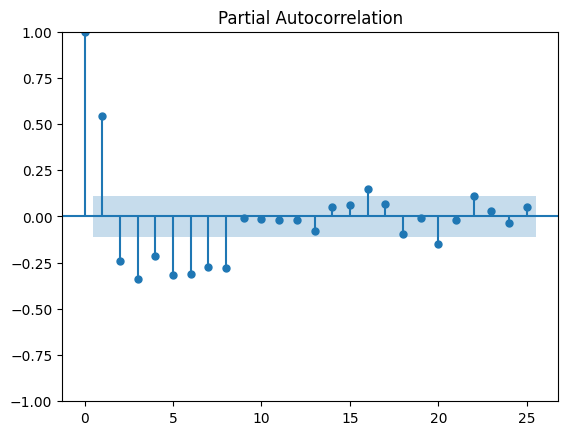

In [50]:
from statsmodels.graphics import tsaplots
tsaplots.plot_pacf(sun);
p=8

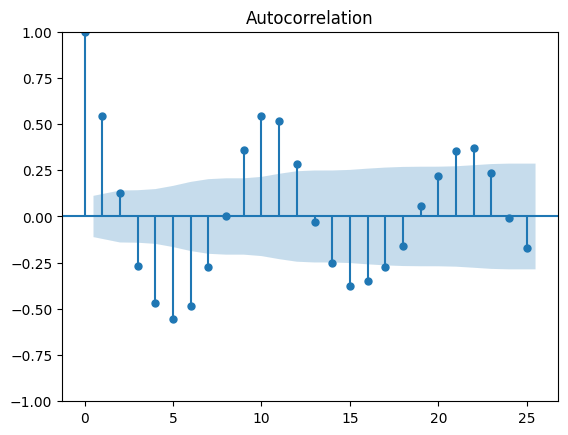

In [51]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(sun);
q=1

In [57]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(endog=dta, order = (p,d,q))
clf = model.fit()
print(clf.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(8, 1, 1)   Log Likelihood               -1273.274
Date:                Wed, 10 May 2023   AIC                           2566.547
Time:                        14:21:55   BIC                           2603.848
Sample:                    12-31-1700   HQIC                          2581.462
                         - 12-31-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2773      0.188      1.477      0.140      -0.091       0.645
ar.L2         -0.2289      0.070     -3.264      0.001      -0.366      -0.091
ar.L3         -0.3490      0.067     -5.175      0.0

In [58]:
clf.predict(pd.to_datetime('2009-12-31'))

2009-12-31    31.801097
Freq: A-DEC, dtype: float64

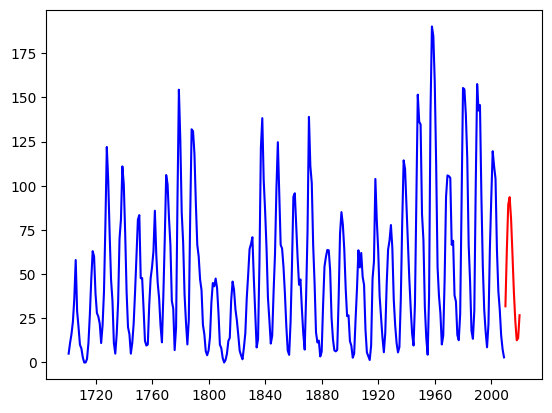

In [67]:
dates = [pd.to_datetime(f'{year}-12-31') for year in range(2009,2020)]
predictions = [clf.predict(date).values[0] for date in dates]

plt.plot(dta.index, dta, 'b-')
plt.plot(dates, predictions, 'r-')

In [66]:
clf.predict(pd.to_datetime('2009-12-31')).values[0]

31.801097466141083